# Tarea 1 ICM3920

### Alumno: Alonso Espinoza Correa

Link a git en caso de tener problemas: https://github.com/AlonsoEspinoza8/TareasCFD.git

# 1) Escriba una rutina para convertir un número real en formato “floating-point” $f 32$. El resultado debe ser una lista (array) de 32 elementos.

Se puede escribir un número binario (que es la representación de un número real) de la siguiente forma:

$$
    (-1)^{\text{sign}} \cdot 0.M \cdot 2^{E - 127}
$$

Donde:
- **sign**: Signo del número real. Puede ser - (número negativo, sign = 1) o + (número positivo, sign = 0).
- **M**: Mantissa: Parte decimal del número binario.
- **E - 127**: Exponente del número binario.

En base a esta información, el formato ***floating point single precision*** de *32 bits* utilizando la siguiente estructura (según **IEEE 754 standard: binary32**):

- bit 0: $sign$ escrito en binario
- bit 1 al 9: Exponente $E$ escrito en binario en 8 bits
- bit 10 al 32: Mantissa escrita en binaria en 23 bits

En el siguiente código, la librería *struct* hace este procesamiento gracias a sus métodos *pack* y *unpack*. Utilizando *struct.pack* se puede convertir un número  flotante a un número binario de 4 bytes. Posteriormente, se utilza el método *struct.unpack* para convertir ese número binario en formato ***floating point single precision*** siguiendo el procedimiento explicado en el inciso anterior. Se implementa una función que recibe un número flotante (número real) y retorna una lista de 32 elementos en el formato solicitado.

Código generado por ChatGPT y Copilot

In [15]:
import struct

def float_to_ieee754_float32(number):
  """
  Converts a Python float (real number) to its IEEE 754 single-precision (float32) 
  binary representation as an integer.
  """
  # Pack the float as a single-precision float ('f' format)
  # The '>' indicates big-endian byte order, '<' for little-endian. 
  # For IEEE 754, byte order matters for the resulting byte string, 
  # but the internal bit representation is standard.
  packed_data = struct.pack('>f', float(number)) 
  
  # Unpack the 4-byte binary data as an unsigned integer ('I' format)
  # This reveals the raw 32-bit integer representation of the float32.
  ieee_int = struct.unpack('>I', packed_data)[0]
  # Convertir a binario de 32 bits y retornar como lista de enteros (0 o 1)
  bit_array = [int(b) for b in f"{ieee_int:032b}"]
    
  return bit_array

# Example usage
real_number = 0.15625
ieee_representation = float_to_ieee754_float32(real_number)
print(f"The real number {real_number} in IEEE 754 float32 integer representation is: {ieee_representation}")
print(f"Number of elements: {len(ieee_representation)}")


The real number 0.15625 in IEEE 754 float32 integer representation is: [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Number of elements: 32


### Fuente:

https://www.youtube.com/watch?v=aj-tH2BVEo8

# 2) Obtenga la precisión de su computador usando una rutina de python.


La precisión de un computador se define como la mínima diferencia entre un número y el siguiente número que un computador puede interpretar. Con la librería *sys* se puede conocer la precisión gracias al método *sys.float_info.epsilon* 

Código generado por Gemini (asistente IA de Google)


In [16]:
import sys

# Get the machine epsilon for float type
machine_epsilon = sys.float_info.epsilon
print(f"Machine Epsilon (float precision): {machine_epsilon}")

Machine Epsilon (float precision): 2.220446049250313e-16


Por lo tanto, la precisión del computador (Macbook Pro M1 2020) es del orden de $10^{-16}$

# 3) Simule un flujo de aire de $v_0 = 0,5$ m/s en la geometría indicada usando OpenFoam (use condiciones inlet-outlet). Varíe el largo del dominio y discuta.

<img src="Fotos/pregunta3.png" alt="Pregunta 3" width="3000">

Para poder simular el flujo, se modifica una simulación de un flujo sobre un cilindro al modificar el archivo *blockMeshDict* y sus respectivas condiciones iniciales. 

Se definen tres bloques dentro de la malla. El primero es un bloque que representa la entrada, de 4 metros de largo, 3 de ancho y 0.1 metros de profundo. El segundo es un bloque que representa la continuación del primer bloque, con un largo $L$ variable que vería entre $L = 5$, $L = 10$ y $L = 20$ para distintas simulaciones. Por último, se crea un tercer bloque que se sitúa debajo del segundo bloque, donde el largo de este también es $L$ y la altura es de 2 metros.

Se definen lsos bloques de la siguiente manera con el fin de obtener una malla más fina en la parte inferior del ensanchamiento. La malla se puede ver en la siguiente figura.

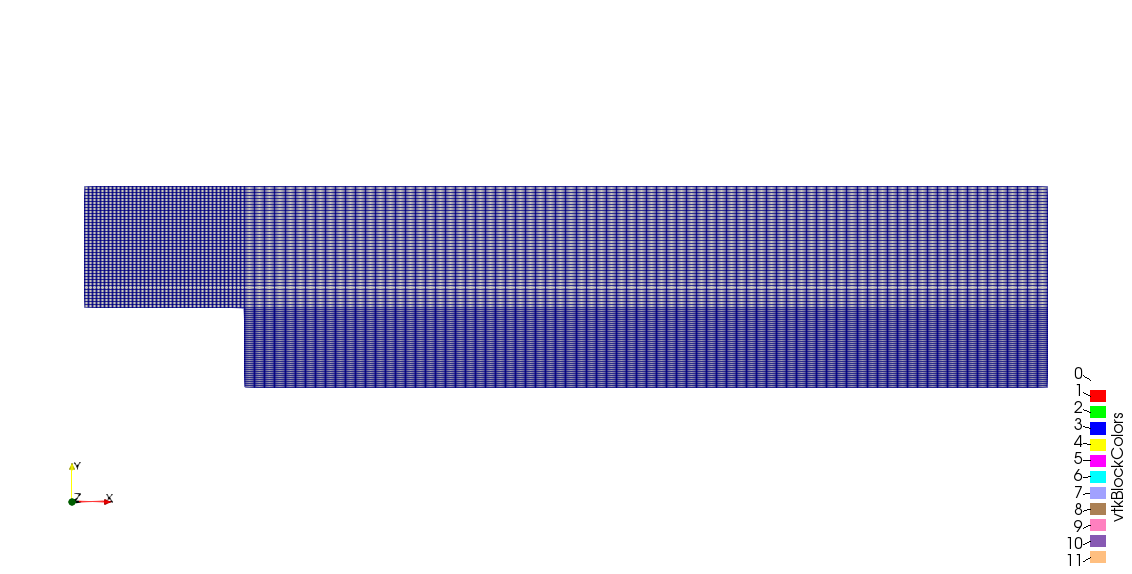

A continuación se muestran los resultados obtenidos para las tres simulaciones mencionadas. Se utiliza el solver *simpleFoam*, que funciona para flujos turbulentos en estado estacionario.

### Caso $L = 5 \;m$

<video controls src="Videos/L_5_animation.mp4" title="Title"></video>

Se puede ver que no representa del todo bien la zona de recirculación producida por el ensanchamiento del flujo. Esto se debe a que la condición de que no existe gradiente de velocidad a 5 metros del ensanchamiento no es realista.

### Caso $L = 10 \;m$

<video controls src="Videos/L_10_animation.mp4" title="Title"></video>

En este caso se puede ver cómo de un instante a otro el campo de velocidades dentro del fluido cambia y empieza a propagarse la turbulencia inducida por la zona de recirculación. Denuevo es evidente que la simulación no representa el fenómeno debido al salto repentino que se obtiene en la simulación

### Caso $L = 20 \;m$

<video controls src="Videos/L_20_animation.mp4" title="Title"></video>

De las simulaciones realizadas, se puede ver que esta es la que mejor representa la realidad. Cuando se considera una distancia razonable desde la zona donde se induce la turbulencia, el flujo alcanza a convertirse en un flujo desarrollado uniforme, donde se cumple la condición impuesta de que a la salida del volumen de control se tiene un perfil sin gradientes de velocidades.

En conclusión, para poder realizar una simulación adecuada en fluidodinámica computacional se debe considerar una gran distancia desde última zona donde se generan turbulencias para obtener flujos sin gradientes de velocidad que afecten las condiciones de borde de la simulación. Un ejemplo práctico donde se tiene que diseñar considerando una cierta distancia respecto a una zona de turbulencias es en la instalación de flujómetros de turbina. Estos usualmente deben estar instalados a una cierta distancia (que suele ser en función de su diámetro) antes y desupués de la última singularidad, de forma de poder conseguir una medición adecuada, tal como se debe diseñar la malla para obtener una simulación adecuada.

Con el fin de mejorar la simulación para futuros estudios, se propone mejorar el refinado de la malla en zonas cercanas a la capa límite. Además, se pretende ahondar más en los funcionamientos de los diferentes métodos numéricos existentes en OpenFoam con el fin de discutir si este solver realmente era el adecuado para este tipo de flujo

### Fuente:

https://youtu.be/Udt3RhkbgKw?si=N_e8w2mVYOBxJWjU

# 4) Simule un flujo en el canal para distintos números de Reynolds (considere Re= 10,100,1000) en la geometría indicada usando OpenFoam (use condiciones inlet-outlet). Haga una simulación de flujo incompresible transiente, y use un modelo de turbulencia.

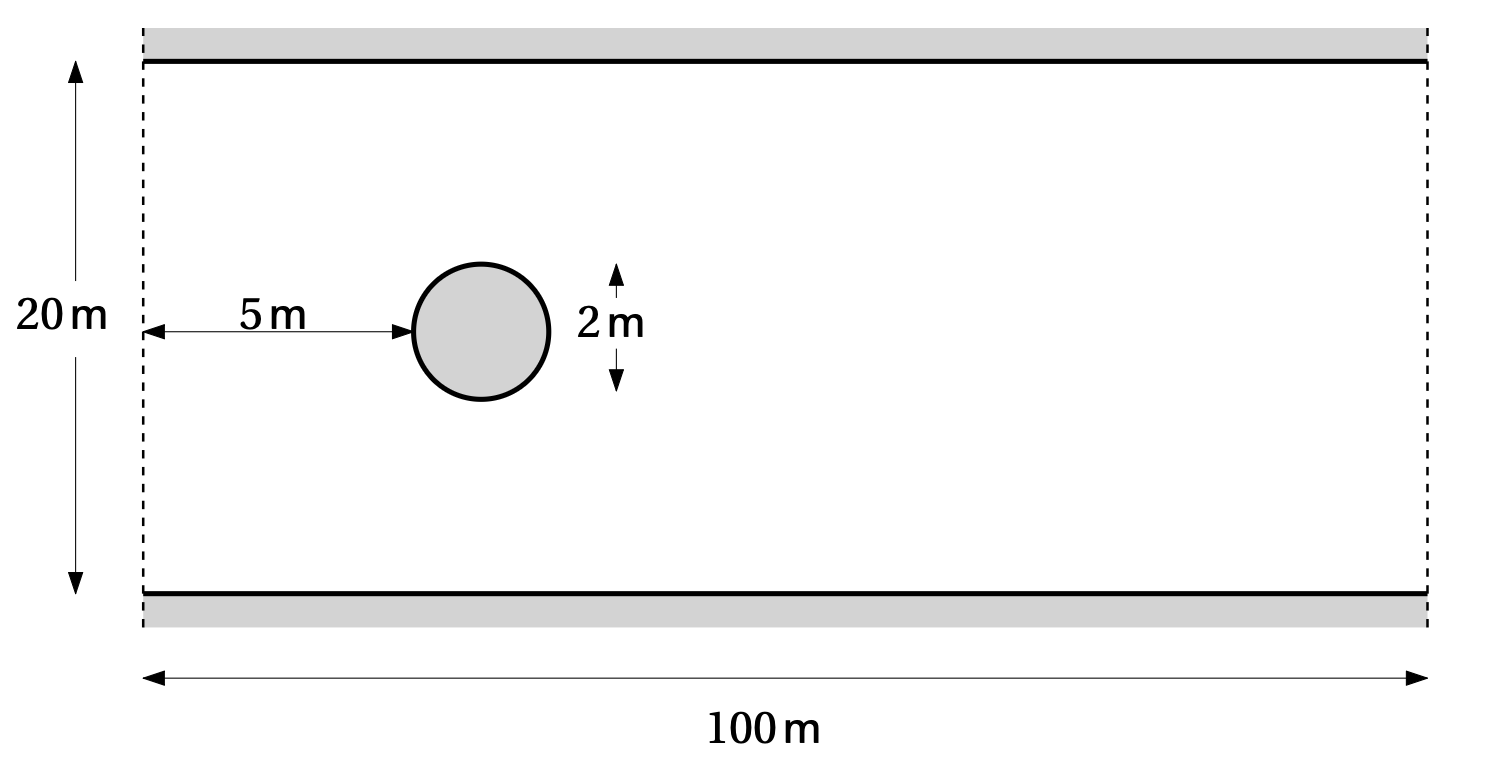

Esta simulaición fue realizada a partir de una simulación similar, donde se cambió la malla y las condiciones iniciales

Para poder definir esta malla, se generan 6 bloques: Dos rectangulares (llamados *pre* y *post block*) y cuatro en forma de trapecio (llamados *obstacle blocks*). Se define la malla de esta forma con el fin de utilizar el tipo de *edge* "*arc*" presente en el archivo *blockMeshDict*. En las siguientes figuras se pueden ver un esquema de la malla y la malla implementada en *paraFoam*

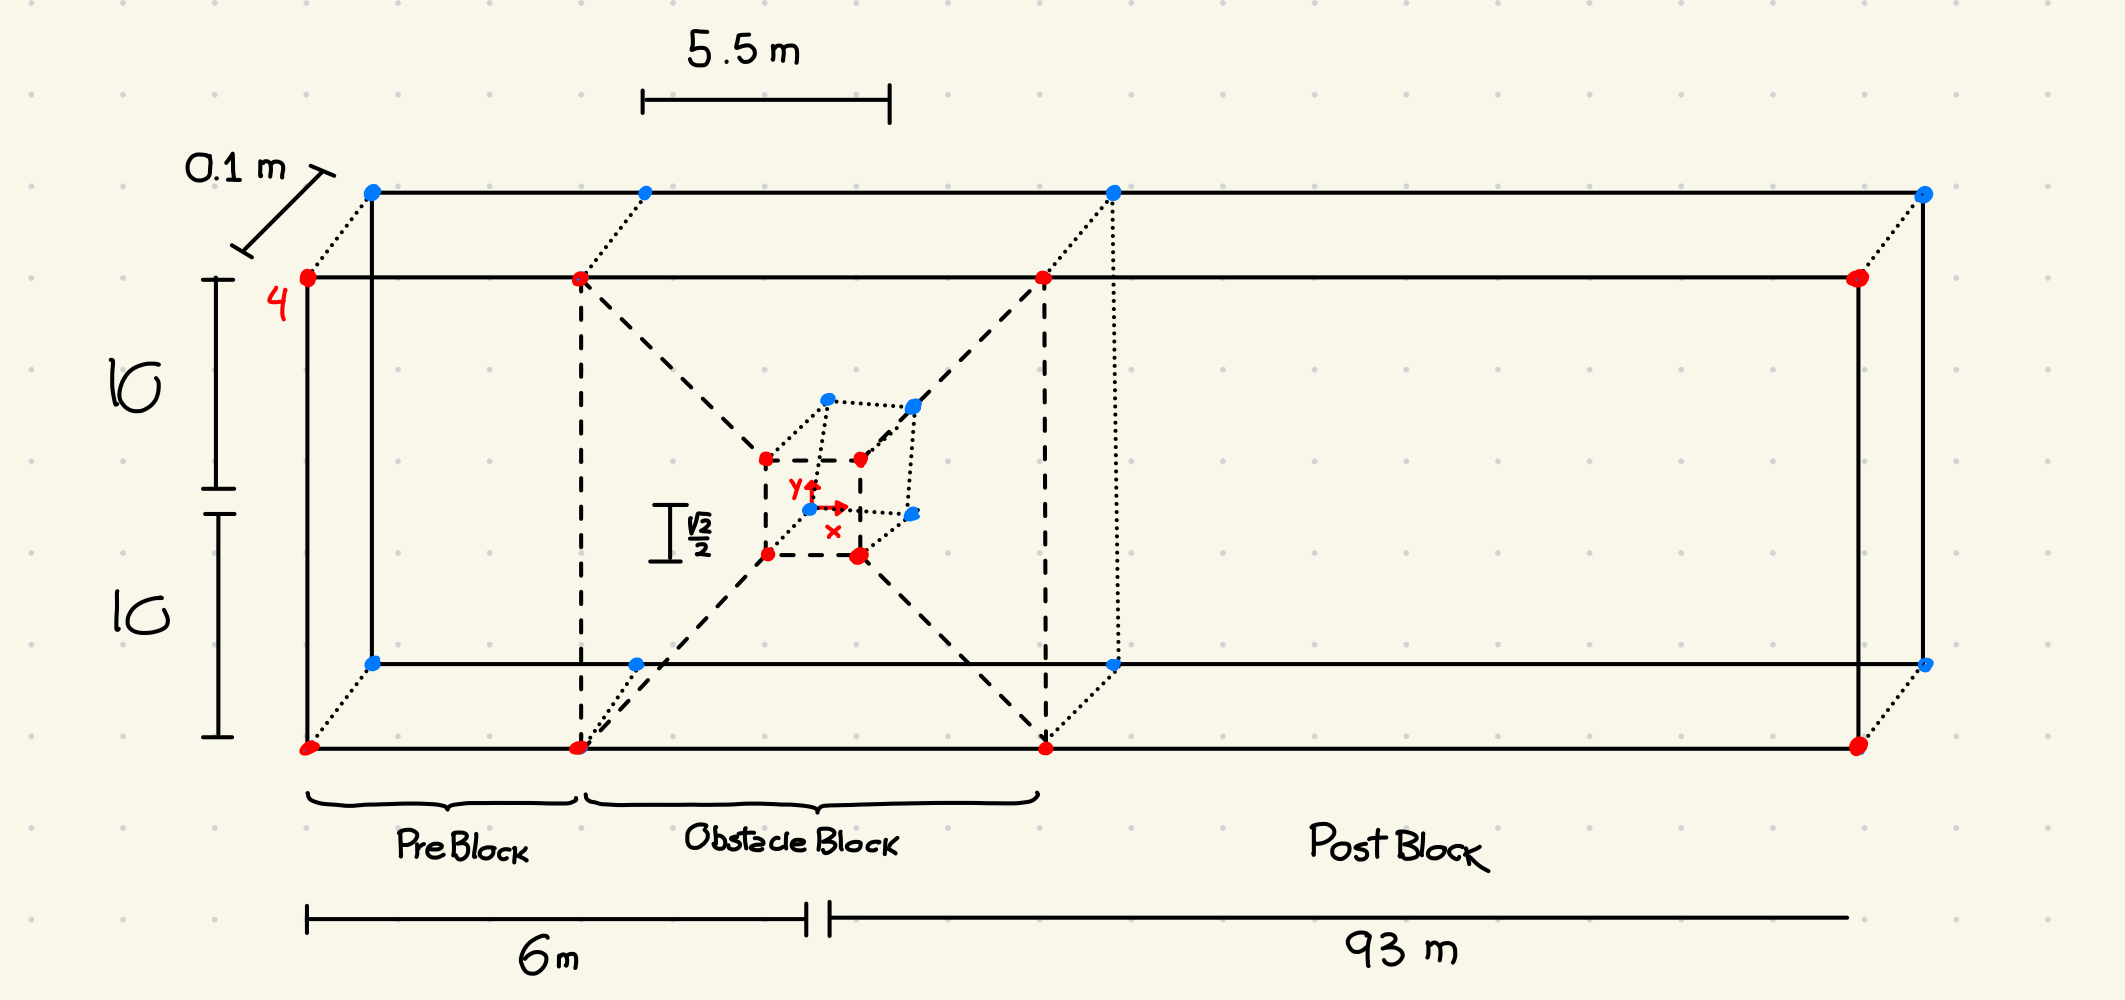

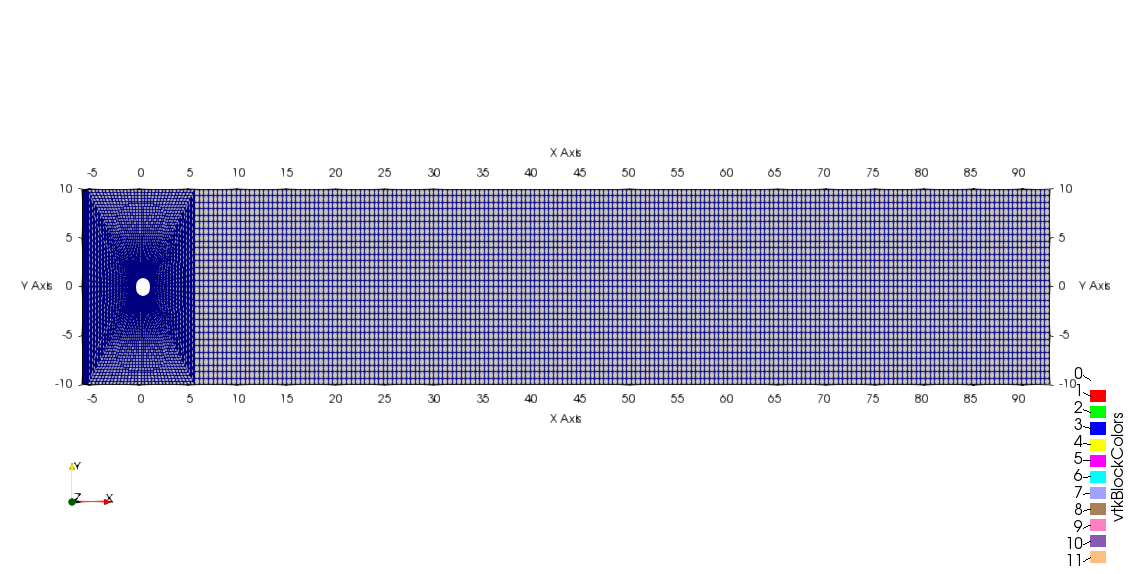

Ahora, para definir la velocidad con la que ingresa el fluido, se despeja la velocidad a partir de la definición del número de Reynolds

$$ Re = \frac{UD}{\nu} \rightarrow U = \frac{Re\nu}{D}$$

Tomando como fluido al aire ($\nu = 1.5\cdot 10^{-5} \frac{m^2}{s}$) y como longitud característica al diámetro del cilindro, se obtienen las siguientes velocidades dependiendo del número de Reynolds

| Número de Reynolds | Velocidad ($\frac{m}{s}$) |
| :-: | :-: | 
| 10 | $7.5 \cdot 10^{-5}$|
| 100 | $7.5 \cdot 10^{-4}$|
| 1000 | $7.5 \cdot 10^{-3}$|

A continuación se muestran los resultados obtenidos en la simulación, la cual fue realizada utilizando *simpleFoam*

### Caso $Re = 10$

<video controls src="Videos/Re_10_animation.mp4" title="Title"></video>

Se puede ver que para un bajo número de Reynolds se produce una estela detrás del cilindro que es bastante gruesa

### Caso $Re = 100$

<video controls src="Videos/Re_100_animation.mp4" title="Title"></video>

Para un número de Reynolds mayor se produce una estela más angosta pero más larga.

### Caso $Re = 1000$

<video controls src="Videos/Re_1000_animation.mp4" title="Title"></video>

Para este caso ya se pueden ver las apariciones de las oscilaciones en el flujo debido a los gradientes de velocidad generados cerca del cilindro.

En conclusión se puede ver que a medida que aumenta el número de Reynolds, existe una disminución en el espesor de la capa límite que se transforma en oscilaciones de la estela producida por el cilindro. Este tipo de flujos se conoce como ***Von Karman Vortex*** y es de común aparición en las nubes.

Para futuras simulaciones se propone cambiar el solver utilizado e implementar un modelo de turbulencia a la simulación con el fin de añadir más realismo a la simulación. (Disclaimer: sé que era lo que pedía en la tarea pero me di cuenta después que no me iba a servir el solver y tampoco pude implementar el modelo de turbulencia ): )

### Fuentes:

https://youtu.be/Udt3RhkbgKw?si=N_e8w2mVYOBxJWjU